In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

%matplotlib inline

In [4]:
sns.set(style='darkgrid', palette='dark', font_scale=2)
rcParams['figure.figsize'] = 10, 6

### Read train and test datasets

In [5]:
train_df = pd.read_csv('train_human_activity.csv')
test_df = pd.read_csv('test_human_activity.csv')
print('Dataframe Shape:\t{0}'.format(train_df.shape))
print('Dataframe Shape:\t{0}'.format(test_df.shape))

Dataframe Shape:	(7352, 563)
Dataframe Shape:	(2947, 563)


### Merge Datasets

In [11]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### Check missing values

In [13]:
print('Null Values In Training Data:\t{0}'.format((train_df.isna().sum().sum())))
print('Null Values In Testing Data:\t{0}'.format((test_df.isna().sum().sum())))

Null Values In Training Data:	0
Null Values In Testing Data:	0


### Check target class distribution

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

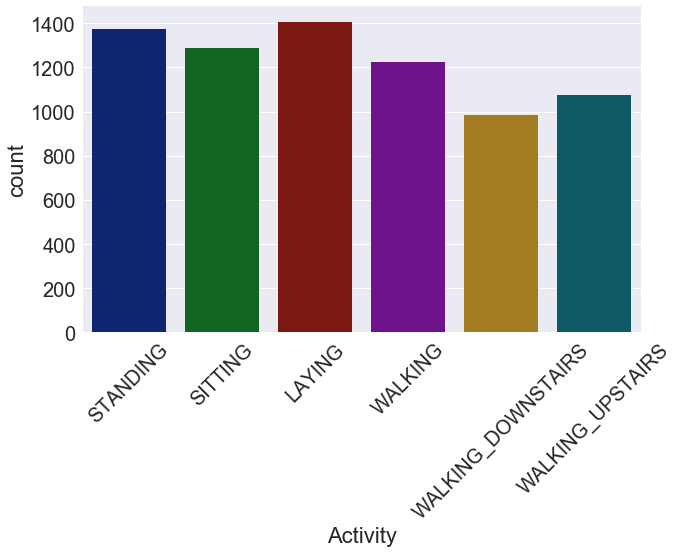

In [14]:
sns.countplot(x='Activity',data=train_df)
plt.xticks(rotation=45)

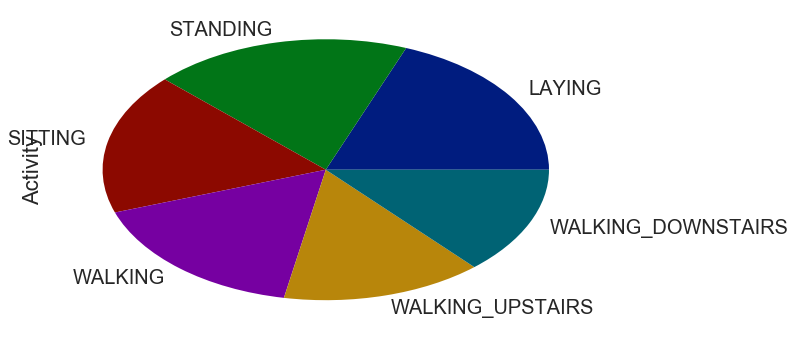

In [15]:
train_df['Activity'].value_counts().plot(kind='pie')

### Split dataframe

In [16]:
X_train = train_df.drop('Activity', axis = 1)
X_test = test_df.drop('Activity', axis = 1)
y_train = train_df['Activity']
y_test = test_df['Activity']

### Label encode target class

In [18]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

### Scaling

In [19]:
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)

### Dimensionality reduction

In [20]:
pca = PCA(n_components=0.9)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

### Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')

In [22]:
dtc.fit(X_train_reduced, y_train_encoded)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
from sklearn.metrics import accuracy_score
y_pred = dtc.predict(X_test_reduced)
accuracy_score(y_pred, y_test_encoded)

0.8103155751611809

### Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier()
rfc.fit(X_train_reduced, y_train_encoded)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
y_pred = rfc.predict(X_test_reduced)
accuracy_score(y_pred, y_test_encoded)

0.8537495758398371

### Get confusion matrix for multiclass classification

In [27]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred, labels=None, sample_weight=None)

In [28]:
def plot_conf_matrix (conf_matrix):
    class_names = [0,1,2,3,4,5]
    fontsize=14
    df_conf_matrix = pd.DataFrame(
            conf_matrix, index=class_names, columns=class_names, 
        )
    fig = plt.figure()
    heatmap = sns.heatmap(df_conf_matrix, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

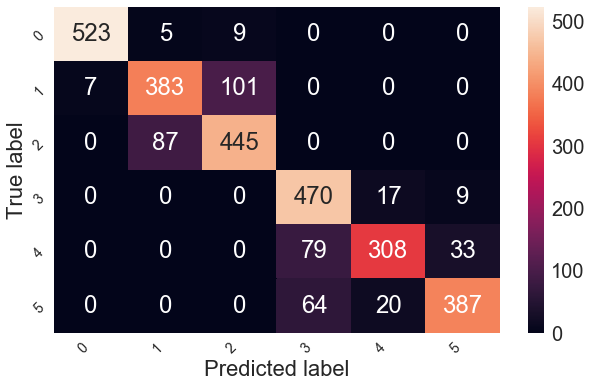

In [29]:
plot_conf_matrix(conf_matrix)